<a href="https://colab.research.google.com/github/MALLI7622/Computer-Vision/blob/master/AIkenist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir Chest

In [ ]:
!wget -P Chest/ https://md-datasets-public-files-prod.s3.eu-west-1.amazonaws.com/31ab5ede-ed34-46d4-b1bf-c63d70411497


--2020-10-19 09:23:58--  https://md-datasets-public-files-prod.s3.eu-west-1.amazonaws.com/31ab5ede-ed34-46d4-b1bf-c63d70411497
Resolving md-datasets-public-files-prod.s3.eu-west-1.amazonaws.com (md-datasets-public-files-prod.s3.eu-west-1.amazonaws.com)... 52.218.60.200
Connecting to md-datasets-public-files-prod.s3.eu-west-1.amazonaws.com (md-datasets-public-files-prod.s3.eu-west-1.amazonaws.com)|52.218.60.200|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1235512464 (1.2G) [application/zip]
Saving to: ‘Chest/31ab5ede-ed34-46d4-b1bf-c63d70411497’

31ab5ede-ed34-46d4- 100%[===================>]   1.15G  11.6MB/s    in 1m 44s  

2020-10-19 09:25:44 (11.3 MB/s) - ‘Chest/31ab5ede-ed34-46d4-b1bf-c63d70411497’ saved [1235512464/1235512464]



In [ ]:
!unzip Chest/31ab5ede-ed34-46d4-b1bf-c63d70411497

Streaming output truncated to the last 5000 lines.
  inflating: chest_xray/train/PNEUMONIA/person802_bacteria_2708.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person902_bacteria_2827.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person825_bacteria_2736.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1733_bacteria_4566.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person28_bacteria_141.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person494_bacteria_2090.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1088_virus_1800.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person62_bacteria_300.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1328_virus_2295.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1109_bacteria_3050.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person554_bacteria_2320.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person573_bacteria_2369.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1597_bacteria_4192.jpeg  
  inflating: chest_xray/train/P

In [ ]:
import numpy as np
import pandas as pd

import os
import matplotlib.pyplot as plt
import cv2
from skimage import io


from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
from PIL import Image, ImageOps

import PIL
from PIL import UnidentifiedImageError

import torch
import torchvision.models as models
import torch 
import torch.nn as nn
import torch.optim as optim



In [ ]:
classes = os.listdir('chest_xray/train/')
print(classes)

['PNEUMONIA', '.DS_Store', 'NORMAL']


In [ ]:
del classes[1]

In [ ]:
classes

['PNEUMONIA', 'NORMAL']

In [ ]:
print("Train Directory :",os.listdir('chest_xray/train/'))
print("Test Directory :", os.listdir('chest_xray/test/'))

Train Directory : ['PNEUMONIA', '.DS_Store', 'NORMAL']
Test Directory : ['PNEUMONIA', '.DS_Store', 'NORMAL']


In [ ]:
print("Number of PNEUMONIA Train Images:", len(os.listdir('chest_xray/train/PNEUMONIA/')))
print("Number of NORMAL Train Images:", len(os.listdir('chest_xray/train/NORMAL/')))

print("Total Number of Train Images:", len(os.listdir('chest_xray/train/NORMAL/')) + len(os.listdir('chest_xray/train/PNEUMONIA/')))


Number of PNEUMONIA Train Images: 3884
Number of NORMAL Train Images: 1349
Total Number of Train Images: 5233


In [ ]:
print("Number of PNEUMONIA Test Images:", len(os.listdir('chest_xray/test/PNEUMONIA/')))
print("Number of NORMAL Test Images:", len(os.listdir('chest_xray/test/NORMAL/')))

print("Total Number of Test Images:", len(os.listdir('chest_xray/test/NORMAL/')) + len(os.listdir('chest_xray/test/PNEUMONIA/')))


Number of PNEUMONIA Test Images: 390
Number of NORMAL Test Images: 234
Total Number of Test Images: 624


In [ ]:
sample_train_pneumonia = os.listdir('chest_xray/train/PNEUMONIA/')[:10]
sample_train_pneumonia

['person470_bacteria_1999.jpeg',
 'person1074_bacteria_3014.jpeg',
 'person730_bacteria_2632.jpeg',
 'person1138_bacteria_3080.jpeg',
 'person1696_bacteria_4495.jpeg',
 'person1308_bacteria_3288.jpeg',
 'person277_bacteria_1303.jpeg',
 'person837_bacteria_2754.jpeg',
 'person1628_bacteria_4296.jpeg',
 'person1579_bacteria_4133.jpeg']

In [ ]:
sample_train_normal = os.listdir('chest_xray/train/NORMAL/')[:10]
sample_train_normal

['NORMAL2-IM-1035-0001.jpeg',
 'IM-0439-0001.jpeg',
 'IM-0156-0001.jpeg',
 'NORMAL2-IM-1102-0001-0001.jpeg',
 'IM-0511-0001-0002.jpeg',
 'IM-0629-0001-0001.jpeg',
 'IM-0523-0001-0002.jpeg',
 'IM-0239-0001.jpeg',
 'NORMAL2-IM-0572-0001.jpeg',
 'NORMAL2-IM-1164-0001.jpeg']

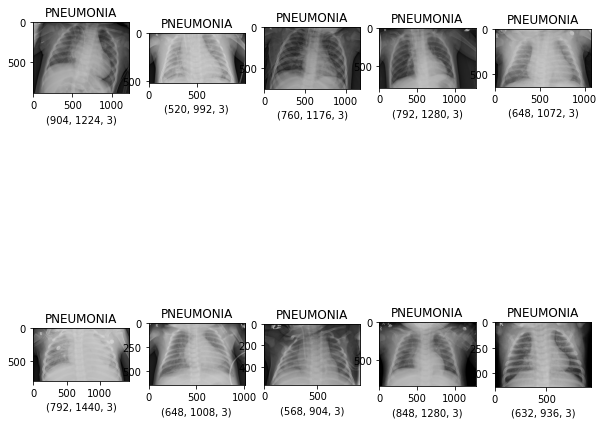

In [ ]:
import matplotlib.pyplot as plt
import cv2
from skimage import io

plt.figure(figsize = (10, 10))

for i in range(len(sample_train_pneumonia)):
  plt.subplot(2, 5, i+1)
  #img = io.imread('chest_xray/train/PNEUMONIA/'+sample_train_pneumonia[i])
  img = cv2.imread('chest_xray/train/PNEUMONIA/'+sample_train_pneumonia[i])
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  plt.imshow(img)
  plt.title(classes[0])
  plt.xlabel(img.shape)


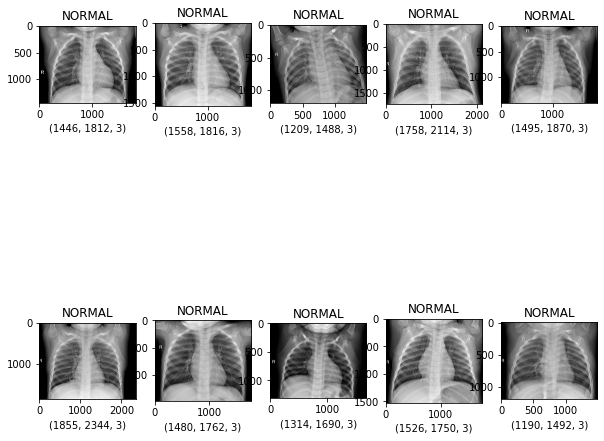

In [ ]:
import matplotlib.pyplot as plt
import cv2

plt.figure(figsize = (10, 10))

for i in range(len(sample_train_normal)):
  plt.subplot(2, 5, i+1)
  img = cv2.imread('chest_xray/train/NORMAL/'+sample_train_normal[i])
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  plt.imshow(img)
  plt.title(classes[1])
  plt.xlabel(img.shape)


In [ ]:
for i, im in enumerate(os.listdir('chest_xray/train/PNEUMONIA')):
  if im == '.DS_Store':
    print("Not an image located at:", i)

Not an image located at: 1586


In [ ]:


train_normal = pd.DataFrame(os.listdir('chest_xray/train/NORMAL'), columns=["images"])
train_normal.to_csv('train_normal.csv', index=False)
print("Saving NORMAL csv file had done..!", len(train_normal))

train_pneumonia = pd.DataFrame(os.listdir('chest_xray/train/PNEUMONIA'), columns=["images"])
train_pneumonia = train_pneumonia.drop([1586])
train_pneumonia.to_csv('train_pneumonia.csv', index=False)
print("Saving PNEUMONIA csv file had done..!", len(train_pneumonia))


test_normal = pd.DataFrame(os.listdir('chest_xray/test/NORMAL'), columns=["images"])
test_normal.to_csv('test_normal.csv', index=False)
print("Saving test NORMAL csv file had done..!", len(test_normal))

test_pneumonia = pd.DataFrame(os.listdir('chest_xray/test/PNEUMONIA'), columns=["images"])
test_pneumonia.to_csv('test_pneumonia.csv', index=False)
print("Saving test PNEUMONIA csv file had done..!", len(test_pneumonia))



Saving NORMAL csv file had done..! 1349
Saving PNEUMONIA csv file had done..! 3883
Saving test NORMAL csv file had done..! 234
Saving test PNEUMONIA csv file had done..! 390


In [ ]:
train_batch_size = 32
test_batch_size = 4

In [ ]:
class MyCustomDataset(Dataset):
   
    def __init__(self, csv_file, root_dir, label, transform=None):
   
        self.images = pd.read_csv(csv_file)

        self.root_dir = root_dir
        
        self.label = torch.Tensor([label])

        self.transform = transform

    def __len__(self):
        
        return len(self.images)

    def __getitem__(self, idx):

        problem_files = []
        if torch.is_tensor(idx):
            idx = idx.tolist()

        img_name = os.path.join(self.root_dir,
                                self.images.iloc[idx, 0])
        image = Image.open(img_name)

        image = image.convert('RGB')

        if self.transform:
            image = self.transform(image)
       
        return (image, self.label)

In [ ]:
train_normal_dataset = MyCustomDataset('train_normal.csv', 'chest_xray/train/NORMAL', 1,transform = 
                               transforms.Compose([
                                                   transforms.Resize(256),
                                                   transforms.RandomCrop(224),
                                                   transforms.ToTensor(),
                                                   transforms.Normalize(mean=(0.5, ), std=(0.5,))]))


In [ ]:
train_pneumonia_dataset = MyCustomDataset('train_pneumonia.csv', 'chest_xray/train/PNEUMONIA', 0,transform = 
                               transforms.Compose([
                                                   transforms.Resize(256),
                                                   transforms.RandomCrop(224),
                                                   transforms.ToTensor(),
                                                   transforms.Normalize(mean=(0.5, ), std=(0.5,))]))



In [ ]:
concat_train_dataset = torch.utils.data.ConcatDataset([train_normal_dataset, train_pneumonia_dataset])
train_dataloader = torch.utils.data.DataLoader(concat_train_dataset, batch_size= 32, shuffle= True)


In [ ]:
dataiter = iter(train_dataloader)
images, labels = dataiter.next()
labels = torch.squeeze(labels)
print(images.shape)
print(images[0].shape)
print(labels.shape)
print(labels[0].item())

print(labels)

torch.Size([32, 3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([32])
1.0
tensor([1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1.,
        1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0.])


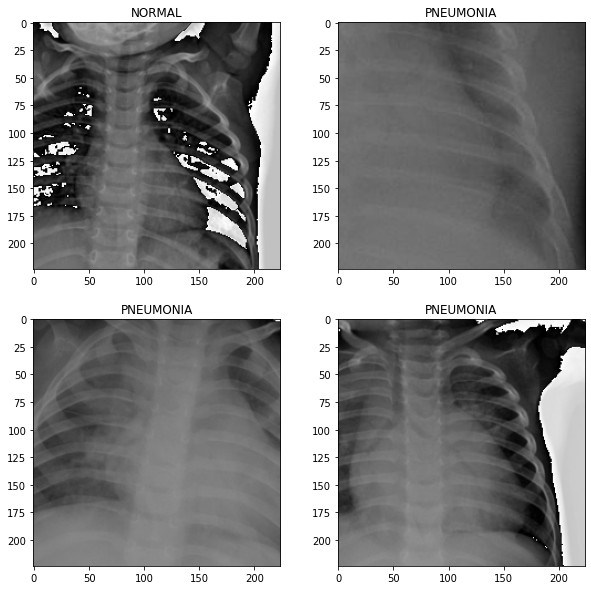

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(4):
  plt.subplot(2, 2, i+1)
 # plt.imshow(np.squeeze(((images[i] + 0.5) * 0.5).mul(255)), cmap = "gray")
  plt.imshow(((images[i] + 0.5) * 0.5 ).mul(255).permute(1, 2, 0).byte().numpy())
  plt.title(classes[int(labels[i])])


In [ ]:
test_normal_dataset = MyCustomDataset('test_normal.csv', 'chest_xray/test/NORMAL', 0,transform = 
                               transforms.Compose([
                                                   transforms.Resize(256),
                                                   transforms.RandomCrop(224),
                                                   transforms.ToTensor(),
                                                   transforms.Normalize(mean=(0.5, ), std=(0.5,))]))


In [ ]:
test_pneumonia_dataset = MyCustomDataset('test_pneumonia.csv', 'chest_xray/test/PNEUMONIA', 0,transform = 
                               transforms.Compose([
                                                   transforms.Resize(256),
                                                   transforms.RandomCrop(224),
                                                   transforms.ToTensor(),
                                                   transforms.Normalize(mean=(0.5, ), std=(0.5,))]))


In [ ]:
concat_test_dataset = torch.utils.data.ConcatDataset([test_normal_dataset, test_pneumonia_dataset])
test_dataloader = torch.utils.data.DataLoader(concat_test_dataset, batch_size= test_batch_size, shuffle= True)

In [ ]:
dataiter = iter(test_dataloader)
images, labels = dataiter.next()
labels = torch.squeeze(labels)
print(images.shape)
print(images[0].shape)
print(labels.shape)
print(labels[0].item())

print(labels)

torch.Size([4, 3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([4])
0.0
tensor([0., 0., 0., 0.])


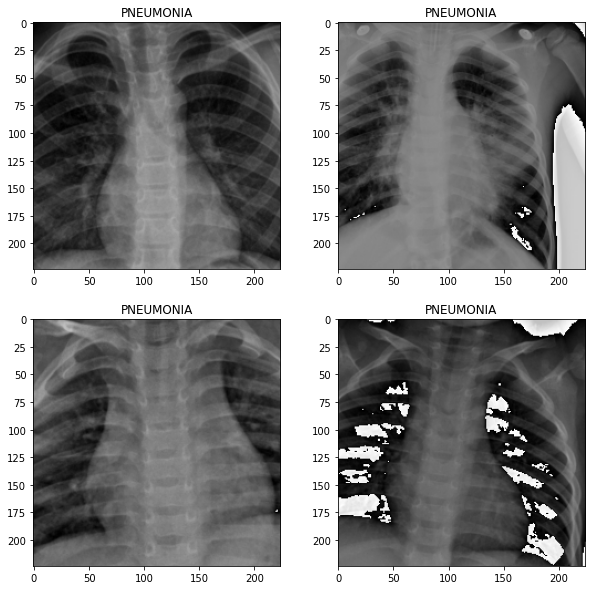

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(4):
  plt.subplot(2, 2, i+1)
 # plt.imshow(np.squeeze(((images[i] + 0.5) * 0.5).mul(255)), cmap = "gray")
  plt.imshow(((images[i] + 0.5) * 0.5 ).mul(255).permute(1, 2, 0).byte().numpy())
  plt.title(classes[int(labels[i])])


In [ ]:
Model = models.resnet18(pretrained=True)


In [ ]:
Model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
Model.fc

Linear(in_features=512, out_features=1000, bias=True)

In [ ]:
final_out_features = Model.fc.out_features
print("Final Input Features of the Pretrained Model:", final_out_features)


Final Input Features of the Pretrained Model: 1000


In [ ]:
Model.fc.out_features = len(classes)

In [ ]:
Model.fc

Linear(in_features=512, out_features=2, bias=True)

In [ ]:
print("Final Input Features of the Pretrained Model:", Model.fc.out_features)


Final Input Features of the Pretrained Model: 2


In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(Model.parameters())

In [ ]:

print("Loss:\n", loss_fn)
print("\n\n Optimizer:\n", optimizer)

Loss:
 CrossEntropyLoss()


 Optimizer:
 Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.001
    weight_decay: 0
)


In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [ ]:
Model = Model.to(device)

In [ ]:
def evaluation_model(dataloader, model):

  total, correct = 0, 0
  for data in dataloader:
    inputs, labels = data
    labels = torch.squeeze(labels)
    inputs, labels = inputs.to(device), labels.to(device)
    output = model(inputs)
    _, pred = torch.max(output.data, 1)
    total += labels.size(0)
    correct += (pred == labels).sum().item()

  return correct / total

In [ ]:

def train(epochs = 1, display_plots = True):

  loss_epoch_arr = []
  
  test_accu = []
  train_accu =[]
  max_epochs = epochs

  for epoch in range(max_epochs):

    loss_arr = []

    for j, data in enumerate(train_dataloader):

      images, labels = data
      labels = torch.squeeze(labels)
      #print(images.shape[0])
      #labels = torch.Tensor([1] * images.shape[0])
      optimizer.zero_grad()

      images = images.to(device)
      labels = labels.long().to(device)
          
      outputs = Model(images)
      #  print("\n\n", len(labels))
        # print("\n\n",len(outputs))
        # print("\n\n labels", labels)
        # print("\n\n outputs", outputs)
        # print("type(labels)",type(labels))
        # print("type(outputs)", type(outputs))

          #print("Labels shape", labels.shape)
          #print("Outputs shape", outputs.shape)

      loss = loss_fn(outputs, labels)
          #print(loss)
      loss.backward()
          #print("back")
      optimizer.step()

      loss_arr.append(loss.item())
        #print(loss_arr)
          
          
    loss_epoch_arr.append(round(sum(loss_arr), 2))

    Train_Accuracy = round(evaluation_model(train_dataloader, Model) * 100, 2)
    Test_Accuracy = round(evaluation_model(test_dataloader, Model) * 100, 2)
    print('\nEpoch [%d / %d] ' % (epoch + 1, max_epochs), "Loss : ", round(sum(loss_arr), 2), "Train Acccuracy : ", 
          Train_Accuracy, "Test Accuracy : ", Test_Accuracy)
    #print("\nTrain Accuracy: ", evaluation(train_dataloader) * 100)
    #print("\nTest Accuracy: ", evaluation(test_dataloader) * 100)
    train_accu.append(Train_Accuracy)
    test_accu.append(Test_Accuracy)

  if display_plots:
    
    plt.style.use('ggplot')
    
    plt.plot( loss_epoch_arr, label = "Training Loss:")
    plt.title("Loss per Epochs")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend(loc = "upper right")
    plt.show()
    
    plt.plot(train_accu, label = "Train Accuracy")
    plt.plot(test_accu, label = "Test Accuracy")
    plt.title("Train & Test Accuracies per Epochs")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend(loc = "upper left")
    plt.show()


    #print( )
    #print("\nTrain Normal Accuracy:", evaluation(train_normal_dataloader, 1))
    #print("\nTrain Pneumonia Accuracy:", evaluation(train_pneumonia_dataloader, 0))
    #print("\nTest Normal Accuracy:", evaluation(test_normal_dataloader, 1))
    #print("\nTest Pneumonia Accuracy:", evaluation(test_pneumonia_dataloader, 0))
    #print("------------------------------------------ \n\n")




Epoch [1 / 20]  Loss :  56.81 Train Acccuracy :  96.25 Test Accuracy :  81.57

Epoch [2 / 20]  Loss :  15.77 Train Acccuracy :  96.77 Test Accuracy :  76.92

Epoch [3 / 20]  Loss :  13.33 Train Acccuracy :  96.5 Test Accuracy :  71.15

Epoch [4 / 20]  Loss :  11.09 Train Acccuracy :  97.94 Test Accuracy :  77.24

Epoch [5 / 20]  Loss :  10.01 Train Acccuracy :  98.01 Test Accuracy :  72.6

Epoch [6 / 20]  Loss :  9.07 Train Acccuracy :  98.41 Test Accuracy :  70.03

Epoch [7 / 20]  Loss :  8.33 Train Acccuracy :  98.2 Test Accuracy :  70.83

Epoch [8 / 20]  Loss :  7.88 Train Acccuracy :  98.36 Test Accuracy :  70.35

Epoch [9 / 20]  Loss :  7.65 Train Acccuracy :  98.76 Test Accuracy :  68.59

Epoch [10 / 20]  Loss :  8.03 Train Acccuracy :  98.74 Test Accuracy :  69.71

Epoch [11 / 20]  Loss :  6.3 Train Acccuracy :  98.53 Test Accuracy :  65.54

Epoch [12 / 20]  Loss :  9.03 Train Acccuracy :  97.55 Test Accuracy :  67.15

Epoch [13 / 20]  Loss :  8.59 Train Acccuracy :  98.97 Test

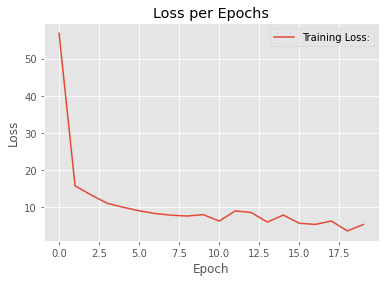

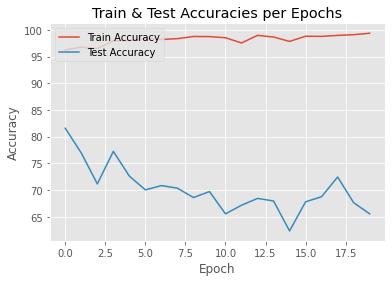

CPU times: user 1h 10min 38s, sys: 2min 6s, total: 1h 12min 44s
Wall time: 1h 12min 44s


In [67]:
%%time
train(epochs = 20, display_plots = True)

In [121]:
def predict(dataloader, Model, display_results = False):

  for n, data in enumerate(dataloader):

    inputs, labels = data
    labels = torch.squeeze(labels)
    inputs, labels = inputs.to(device), labels.to(device)
    output = Model(inputs)
    _, pred = torch.max(output.data, 1)
  
    print("Original Labels: ", labels, "; predictions : ", pred)

    if display_results:
    
      plt.figure(figsize = (10, 10))

      for i in range(len(labels)):

        plt.subplot(int(np.sqrt(test_batch_size)), int(np.sqrt(test_batch_size)), i + 1)
        plt.imshow(((images[i] + 0.5) * 0.5 ).mul(255).permute(1, 2, 0).byte().numpy())
        plt.title("Original: " + classes[int(labels[i].item())] + "\n Predicted:" + classes[pred[i].item()])
        
    if n == 0:
      break
           

Original Labels:  tensor([0., 0., 0., 0.], device='cuda:0') ; predictions :  tensor([1, 0, 0, 0], device='cuda:0')


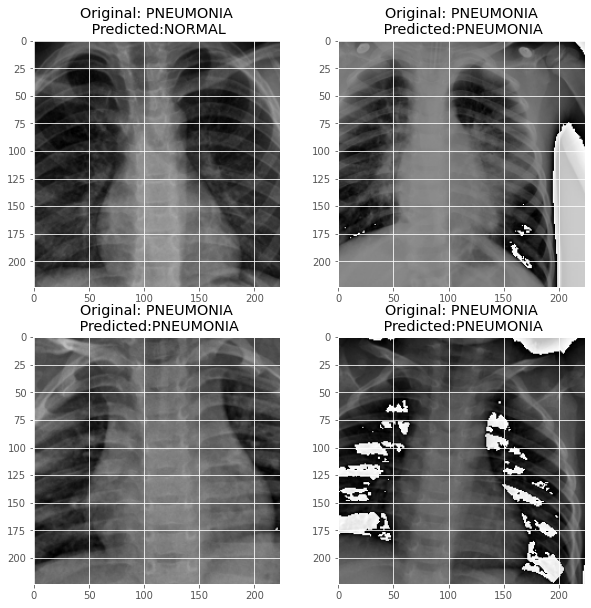

In [122]:
predict(test_dataloader, Model,display_results = True)

In [ ]:
resnet = models.resnet18(pretrained = True)

In [ ]:
print(resnet)

In [ ]:
in_features = resnet.fc.in_features
print(in_features)


In [ ]:
resnet.fc = nn.Linear(in_features, len(classes))

In [ ]:
resnet.fc

In [ ]:
for param in resnet.fc.parameters():
  if param.requires_grad:
    print(param.shape)

In [ ]:
resnet = resnet.to(device)
loss_fn = nn.CrossEntropyLoss()
opt = optim.Adam(resnet.parameters())

In [ ]:
plt.style.use('ggplot')
plt.plot(tr, label='Training accuracy')
plt.plot(te, label='Testing accuracy')
plt.title('Loss on Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

plt.plot(L, label='Training loss')
#plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Multi-class model training / validation loss values')
plt.ylabel('Loss value')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()